# 커피지수 구하기

#### 커피지수 (스타벅스 + 커피빈)/(이디야 + 빽다방)

In [2]:
import pandas as pd
import time 
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup
import numpy as np

In [62]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

In [4]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

### 데이터 하나 보기

In [5]:
tmp = pd.read_csv('./data/cafe/소상공인시장진흥공단_상가(상권)정보_서울_202009.csv',sep='|')

In [6]:
tmp.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [7]:
tmp.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
3,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249
4,19993199,고려대학교교육관쎄리오점,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1129012500100010002039525,고려대학교안암캠퍼스(인문사회계),서울특별시 성북구 안암로 145,136701,2841.0,NaN,1,32,127.031702,37.588485


In [8]:
tmp= tmp[tmp.iloc[:,5] == 'Q12']
tmp.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
4,19993199,고려대학교교육관쎄리오점,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1129012500100010002039525,고려대학교안암캠퍼스(인문사회계),서울특별시 성북구 안암로 145,136701,2841.0,NaN,1,32,127.031702,37.588485
7,20020124,스완카페트,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1156013300106040056037792,NaN,서울특별시 영등포구 도신로10가길 11-1,150070,7379.0,NaN,2,NaN,126.897710,37.503693
25,19973708,왕실,NaN,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1114012700101050000019781,NaN,서울특별시 중구 남대문로 52-13,100810,4535.0,NaN,1,NaN,126.982419,37.562274
29,20004707,커피빈,코리아교대점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1165010800116570005024412,카이스시스템빌딩,서울특별시 서초구 서초중앙로 118,137070,6634.0,NaN,1,NaN,127.014217,37.492388


In [9]:
tmp = tmp.iloc[:,[1,2,12,14,-8,-1,-2]]

In [10]:
tmp.head()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도
0,커피빈코리아선릉로93길점,코리아선릉로93길점,서울특별시,강남구,서울특별시 강남구 선릉로93길 6,37.505675,127.047883
4,고려대학교교육관쎄리오점,NaN,서울특별시,성북구,서울특별시 성북구 안암로 145,37.588485,127.031702
7,스완카페트,NaN,서울특별시,영등포구,서울특별시 영등포구 도신로10가길 11-1,37.503693,126.897710
25,왕실,NaN,서울특별시,중구,서울특별시 중구 남대문로 52-13,37.562274,126.982419
29,커피빈,코리아교대점,서울특별시,서초구,서울특별시 서초구 서초중앙로 118,37.492388,127.014217


### 전체 데이터 읽어오기

In [11]:
import glob
import os

input_file = r'./data/cafe' # csv파일들이 있는 디렉토리 위치
output_file = r'./data/cafe/전국카페.csv' # 병합하고 저장하려는 파일명

allFile_list = glob.glob(os.path.join(input_file, '소상공인시장진흥공단_*')) # glob함수로 sales_로 시작하는 파일들을 모은다
print(allFile_list)
allData = [] # 읽어 들인 csv파일 내용을 저장할 빈 리스트를 하나 만든다
for file in allFile_list:
    df = pd.read_csv(file,sep='|') # for구문으로 csv파일들을 읽어 들인다
    allData.append(df) # 빈 리스트에 읽어 들인 내용을 추가한다

dataCombine = pd.concat(allData, axis=0, ignore_index=True) # concat함수를 이용해서 리스트의 내용을 병합
# axis=0은 수직으로 병합함. axis=1은 수평. ignore_index=True는 인데스 값이 기존 순서를 무시하고 순서대로 정렬되도록 한다.


['./data/cafe/소상공인시장진흥공단_상가(상권)정보_전북_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_경북_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_경남_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_전남_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_인천_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_광주_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_강원_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_충북_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_충남_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_대전_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_서울_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_울산_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_경기_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_제주_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_세종_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_대구_202009.csv', './data/cafe/소상공인시장진흥공단_상가(상권)정보_부산_202009.csv']


In [12]:
df = dataCombine[dataCombine.iloc[:,5] == 'Q12']

In [13]:
df = df.iloc[:,[1,2,12,14,-8,-1,-2]]

In [14]:
df.head()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도
2,용다방,NaN,전라북도,임실군,전라북도 임실군 관촌면 사선로 46-1,35.674618,127.270176
18,마크브라운,NaN,전라북도,익산시,전라북도 익산시 배산로3길 44,35.946892,126.936266
216,연,NaN,전라북도,전주시 완산구,전라북도 전주시 완산구 현무1길 31-7,35.821319,127.146947
370,인앤아웃,NaN,전라북도,전주시 완산구,전라북도 전주시 완산구 봉곡3길 21,35.812166,127.099331
404,미르씨앤에스,NaN,전라북도,익산시,전라북도 익산시 익산대로 460,35.964225,126.957973


In [15]:
df.reset_index(drop=True,inplace=True)

In [16]:
df.tail()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도
105096,메가커피,지사동점,부산광역시,강서구,부산광역시 강서구 과학산단로 349,35.148676,128.831208
105097,셀독24스터디카페,화명점,부산광역시,북구,부산광역시 북구 금곡대로 368,35.241252,129.014286
105098,성별에이유,명지국제신도시점,부산광역시,강서구,부산광역시 강서구 명지국제8로 230,35.097932,128.917833
105099,스타벅스,부산역라마다점,부산광역시,동구,부산광역시 동구 중앙대로196번길 10,35.114259,129.040355
105100,타이지엔,명지오션시티점,부산광역시,강서구,부산광역시 강서구 명지오션시티4로 82,35.081699,128.903264


### 지역별 ID 부여하기

In [17]:
# 어제 특이했던 지역들 확인
df[df['시군구명']=='고성군']

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도
10309,송림다방,NaN,경상남도,고성군,경상남도 고성군 회화면 관인로 14-14,35.055774,128.371262
10517,나인커피,NaN,경상남도,고성군,경상남도 고성군 고성읍 동외로 142,34.973636,128.326416
10590,연화휴게실,NaN,경상남도,고성군,경상남도 고성군 영오면 영회로 3-1,35.091146,128.188145
10609,태양다방,NaN,경상남도,고성군,경상남도 고성군 고성읍 남해안대로 2623-9,34.977486,128.332948
10634,송이찻집,NaN,경상남도,고성군,경상남도 고성군 고성읍 중앙로25번길 58,34.976633,128.324982
...,...,...,...,...,...,...,...
33484,스무디킹,대명델피노점,강원도,고성군,강원도 고성군 토성면 미시령옛길 1153,38.213128,128.493408
33497,카페,베짱이,강원도,고성군,강원도 고성군 토성면 천학정길 12,38.289298,128.547834
33512,흘리커피,NaN,강원도,고성군,강원도 고성군 간성읍 진부령로 647,38.263855,128.358897
33600,엔씨원소울브릿지,NaN,강원도,고성군,강원도 고성군 토성면 천진해변길 33,38.259818,128.559267


In [18]:
df[df['시군구명']=='안양시 동안구']

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도
67228,위너스피씨카페,NaN,경기도,안양시 동안구,경기도 안양시 동안구 평촌대로217번길 25,37.390433,126.954447
67268,띠아모안양시동안점,동안점,경기도,안양시 동안구,경기도 안양시 동안구 평촌대로243번길 30,37.392826,126.953025
67285,오렌지,NaN,경기도,안양시 동안구,경기도 안양시 동안구 관평로182번길 54,37.393853,126.963254
67287,코쿤쿡,NaN,경기도,안양시 동안구,경기도 안양시 동안구 평촌대로223번길 68,37.390393,126.951952
67314,한송정디저트,NaN,경기도,안양시 동안구,경기도 안양시 동안구 부림로 156,37.397384,126.963081
...,...,...,...,...,...,...,...
91255,카페밸리,NaN,경기도,안양시 동안구,경기도 안양시 동안구 학의로 268,37.401505,126.967576
91334,카페피네,NaN,경기도,안양시 동안구,경기도 안양시 동안구 경수대로 721,37.385847,126.950468
91431,날쌘카페,안양평촌점,경기도,안양시 동안구,경기도 안양시 동안구 귀인로190번길 17,37.384567,126.960626
91479,카페,수촌홀덤보드,경기도,안양시 동안구,경기도 안양시 동안구 관악대로287번길 24,37.403978,126.954711


In [19]:
df[df['시군구명']=='세종특별자치시']

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도
94007,그때그다방,NaN,세종특별자치시,세종특별자치시,세종특별자치시 세종특별자치시 금남면 용포중앙1길 11-1,36.465662,127.282715
94008,카페예,NaN,세종특별자치시,세종특별자치시,세종특별자치시 세종특별자치시 조치원읍 새내2길 21-2,36.596930,127.300357
94009,봄휴게실,NaN,세종특별자치시,세종특별자치시,세종특별자치시 세종특별자치시 금남면 안금로 533-6,36.440197,127.287946
94010,자주다실,NaN,세종특별자치시,세종특별자치시,세종특별자치시 세종특별자치시 조치원읍 장안로 18-9,36.599961,127.300899
94011,사랑방다실,NaN,세종특별자치시,세종특별자치시,세종특별자치시 세종특별자치시 금남면 용포로 85-2,36.466383,127.281336
...,...,...,...,...,...,...,...
94588,헤이시스,NaN,세종특별자치시,세종특별자치시,세종특별자치시 세종특별자치시 한누리대로 331,36.493931,127.255834
94589,어썸스터디카페,세종대평플레이스점,세종특별자치시,세종특별자치시,세종특별자치시 세종특별자치시 대평로 71,36.473271,127.277222
94590,카페리틀리,세종호수공원점,세종특별자치시,세종특별자치시,세종특별자치시 세종특별자치시 다솜3로 66,36.501092,127.269953
94591,할리스커피,세종가람DT점,세종특별자치시,세종특별자치시,세종특별자치시 세종특별자치시 금송로 589,36.464704,127.244342


In [20]:
df[df['시군구명']=='창원시 마산합포구']

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도
10267,투와이커피,NaN,경상남도,창원시 마산합포구,경상남도 창원시 마산합포구 문화동4길 19,35.185948,128.561842
10270,소렌토찻집,NaN,경상남도,창원시 마산합포구,경상남도 창원시 마산합포구 구산면 이순신로 154-82,35.080570,128.599555
10274,달카페,NaN,경상남도,창원시 마산합포구,경상남도 창원시 마산합포구 산호북17길 44,35.220226,128.585377
10312,더소울커피점,NaN,경상남도,창원시 마산합포구,경상남도 창원시 마산합포구 구산면 해양관광로 925,35.108559,128.548202
10329,피렌체커피숍,NaN,경상남도,창원시 마산합포구,경상남도 창원시 마산합포구 구산면 해양관광로 1295,35.092232,128.572177
...,...,...,...,...,...,...,...
16723,천씨씨커피,마산창동점,경상남도,창원시 마산합포구,경상남도 창원시 마산합포구 창동거리길 32,35.206188,128.574689
16742,에이티엠커피,NaN,경상남도,창원시 마산합포구,경상남도 창원시 마산합포구 북성로 71,35.213642,128.570985
16760,24시셀프커피&디저트,NaN,경상남도,창원시 마산합포구,경상남도 창원시 마산합포구 산호남로 68-1,35.216134,128.587039
16765,더벤티,월영점,경상남도,창원시 마산합포구,경상남도 창원시 마산합포구 월영마을로 12,35.174331,128.557338


In [21]:
type(df['시군구명'][0])

str

In [22]:
df[df['시군구명']=='포항시 남구']

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도
4173,수연다방,NaN,경상북도,포항시 남구,경상북도 포항시 남구 중앙로121번길 15-3,36.024640,129.366580
4199,다인다방,NaN,경상북도,포항시 남구,경상북도 포항시 남구 포스코대로 318-6,36.018608,129.358056
4214,민들레다방,NaN,경상북도,포항시 남구,경상북도 포항시 남구 상도로 65,36.014723,129.355005
4219,가지야,NaN,경상북도,포항시 남구,경상북도 포항시 남구 구룡포읍 구룡포길 155,35.990393,129.561552
4227,카페마레,NaN,경상북도,포항시 남구,경상북도 포항시 남구 동해면 호미로 2944,36.007713,129.467392
...,...,...,...,...,...,...,...
10229,아라당,NaN,경상북도,포항시 남구,경상북도 포항시 남구 구룡포읍 구룡포길117번길 28-8,35.992840,129.561823
10240,스무디킹,이마트24포항청림점,경상북도,포항시 남구,경상북도 포항시 남구 동해안로 5998,35.996885,129.407613
10242,스터디카페구겐하임,포항이동점,경상북도,포항시 남구,경상북도 포항시 남구 대이로 115,36.025561,129.340868
10244,문타로,NaN,경상북도,포항시 남구,경상북도 포항시 남구 오천읍 냉천로298번길 31,35.967953,129.406279


In [23]:
df[df['시도명'].str.find('인천')>=0][df['시군구명']=='미추홀구']

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도
20872,부연다방,NaN,인천광역시,미추홀구,"인천광역시 미추홀구 인주대로 367, (주안동)",37.451768,126.677461
20895,영지커피숍,NaN,인천광역시,미추홀구,"인천광역시 미추홀구 주안중로 28, (주안동)",37.460847,126.682828
20900,카페704,NaN,인천광역시,미추홀구,"인천광역시 미추홀구 소성로 72, (학익동, 장미아파트)",37.445164,126.657552
20912,CAGLIARI,NaN,인천광역시,미추홀구,"인천광역시 미추홀구 연남로 35, (관교동)",37.442472,126.701265
20919,마스터밴딩,NaN,인천광역시,미추홀구,"인천광역시 미추홀구 한나루로 534, (주안동)",37.454001,126.669284
...,...,...,...,...,...,...,...
25987,다옴스터디까페,주안점,인천광역시,미추홀구,인천광역시 미추홀구 경원대로 743,37.448966,126.689614
26019,까페늘,NaN,인천광역시,미추홀구,인천광역시 미추홀구 능해길 69,37.458233,126.641325
26048,오목커피,NaN,인천광역시,미추홀구,인천광역시 미추홀구 석정로 142,37.468370,126.650841
26055,메가커피,인천관교한신점,인천광역시,미추홀구,인천광역시 미추홀구 인하로 348,37.447926,126.686886


In [24]:
si_name = [None] * len(df)

In [25]:
for n in df.index:
    if df['시도명'][n][-3:] not in ['광역시','특별시','자치시']:
        if df['시군구명'][n][:-1]=='고성' and df['시도명'][n]=='강원도':
            si_name[n] = '고성(강원)'
        elif df['시군구명'][n][:-1]=='고성' and df['시도명'][n]=='경상남도':
            si_name[n] = '고성(경남)'
        elif len(df['시군구명'][n].split()) == 1:
            si_name[n] = df['시군구명'][n][:-1]
        elif df['시군구명'][n].split()[1] in ['마산합포구','마산회원구']:
            si_name[n] = df['시군구명'][n].split()[0][:-1] + ' ' + df['시군구명'][n].split()[1][2:-1]
        else:
            if len(df['시군구명'][n].split()[1]) == 2:
                si_name[n] = df['시군구명'][n].split()[0][:-1] + ' ' + df['시군구명'][n].split()[1]
            else: 
                si_name[n] = df['시군구명'][n].split()[0][:-1] + ' ' + df['시군구명'][n].split()[1][:-1]
    elif df['시도명'][n] == '세종특별자치시':
        si_name[n] = '세종'
    else:
        if len(df['시군구명'][n]) == 2:
            si_name[n] = df['시도명'][n][:2] + ' ' + df['시군구명'][n]
        else:
            si_name[n] = df['시도명'][n][:2] + ' ' + df['시군구명'][n][:-1]

In [26]:
si_name[:10]

['임실', '익산', '전주 완산', '전주 완산', '익산', '전주 완산', '군산', '부안', '전주 완산', '김제']

In [27]:
df['ID'] = si_name

In [28]:
df.head()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도,ID
0,용다방,NaN,전라북도,임실군,전라북도 임실군 관촌면 사선로 46-1,35.674618,127.270176,임실
1,마크브라운,NaN,전라북도,익산시,전라북도 익산시 배산로3길 44,35.946892,126.936266,익산
2,연,NaN,전라북도,전주시 완산구,전라북도 전주시 완산구 현무1길 31-7,35.821319,127.146947,전주 완산
3,인앤아웃,NaN,전라북도,전주시 완산구,전라북도 전주시 완산구 봉곡3길 21,35.812166,127.099331,전주 완산
4,미르씨앤에스,NaN,전라북도,익산시,전라북도 익산시 익산대로 460,35.964225,126.957973,익산


### 스타벅스, 커피빈, 이디야, 빽다방 찾기

In [29]:
sb1 = df[df['상호명'].str.find('스타벅스')>=0]
sb1.head()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도,ID
85,스타벅스,전주대한문고점,전라북도,전주시 완산구,전라북도 전주시 완산구 팔달로 194-1,35.819740,127.146753,전주 완산
226,스타벅스,전주홍산로점,전라북도,전주시 완산구,전라북도 전주시 완산구 홍산로 238,35.814869,127.106460,전주 완산
242,스타벅스,전주한옥마을점,전라북도,전주시 완산구,전라북도 전주시 완산구 팔달로 123,35.813435,127.148547,전주 완산
244,스타벅스,군산대점,전라북도,군산시,전라북도 군산시 황룡로 7,35.945729,126.686046,군산
792,스타벅스,전주중화산점,전라북도,전주시 완산구,전라북도 전주시 완산구 유연로 288,35.825113,127.116947,전주 완산


In [30]:
sb2 = df[df['상호명'].str.lower().str.find('starbucks')>=0]
sb2.head()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도,ID
13597,STARBUCKSCOFFEE,NaN,경상남도,김해시,경상남도 김해시 가야로 182,35.261544,128.871703,김해
49622,STARBUCKSCOFFEE,NaN,서울특별시,서초구,서울특별시 서초구 신반포로 176,37.503930,127.002393,서울 서초
74157,STARBUCKSCOFFEE,NaN,경기도,의정부시,경기도 의정부시 행복로 7,37.739587,127.048140,의정부
79252,STARBUCKSCOFFEE,NaN,경기도,성남시 분당구,경기도 성남시 분당구 판교역로192번길 14,37.397375,127.111395,성남 분당


In [31]:
cb1 = df[df['상호명'].str.find('커피빈')>=0]
cb1.head()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도,ID
908,커피빈,NaN,전라북도,전주시 완산구,전라북도 전주시 완산구 기린대로 213,35.825731,127.146357,전주 완산
2667,커피빈,NaN,전라북도,군산시,전라북도 군산시 미원로 126-6,35.979542,126.718340,군산
4562,커피빈,파머스마켓점,경상북도,구미시,경상북도 구미시 산업로 310,36.122215,128.353745,구미
5619,커피빈,NaN,경상북도,상주시,경상북도 상주시 냉림서성길 32,36.419789,128.161067,상주
5768,커피빈,코리아경주미탐시티점,경상북도,경주시,경상북도 경주시 엑스포로 80,35.834576,129.289877,경주


In [32]:
cb2 = df[df['상호명'].str.lower().str.find('coffeebean')>=0]
cb2.head()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도,ID
23102,COFFEEBEAN송도홈플러스점,송도홈플러스점,인천광역시,연수구,인천광역시 연수구 송도국제대로 165,37.380497,126.656775,인천 연수
52990,COFFEEBEAN영동2교사거리점,영동2교사거리점,서울특별시,강남구,서울특별시 강남구 논현로 136,37.481877,127.043233,서울 강남
75890,COFFEEBEANS연천점,연천점,경기도,연천군,경기도 연천군 연천읍 연천로 256,38.099611,127.074831,연천


In [33]:
ed1 = df[df['상호명'].str.find('이디야')>=0]
ed1.head()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도,ID
33,이디야커피,군산나운점,전라북도,군산시,전라북도 군산시 하나운로 28,35.960963,126.702843,군산
95,이디야커피,전주호반5차점,전라북도,완주군,전라북도 완주군 이서면 출판로 40,35.839351,127.057193,완주
182,이디야커피,전동점,전라북도,전주시 완산구,전라북도 전주시 완산구 팔달로 130,35.814256,127.148660,전주 완산
278,이디야커피,정읍중앙점,전라북도,정읍시,전라북도 정읍시 중앙로 125,35.566820,126.852599,정읍
285,이디야커피,서부시장점,전라북도,전주시 완산구,전라북도 전주시 완산구 용머리로 167,35.806612,127.128438,전주 완산


In [34]:
ed2 = df[df['상호명'].str.lower().str.find('ediya')>=0]
ed2.head()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도,ID
7518,EDIYACOFFEE에스프레소,NaN,경상북도,포항시 북구,경상북도 포항시 북구 흥해읍 포항역로 1,36.071881,129.341976,포항 북구
13264,EDIYACOFFEE,NaN,경상남도,창원시,경상남도 창원시 마산회원구 마산역광장로 18,35.236094,128.577240,창원
23281,EDIYACOFFEE,NaN,인천광역시,부평구,인천광역시 부평구 동암광장로 10,37.470990,126.702920,인천 부평
23301,EDIYACOFFEE,NaN,인천광역시,미추홀구,"인천광역시 미추홀구 경인로 129, (숭의동)",37.466806,126.656702,인천 미추홀
34769,EDIYACOFFEE,충북괴산점,충청북도,괴산군,충청북도 괴산군 괴산읍 읍내로 293,36.809391,127.794483,괴산


In [35]:
pdb1 = df[df['상호명'].str.find('빽다방')>=0]
pdb1.head()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도,ID
439,빽다방,전북대1호점,전라북도,전주시 덕진구,전라북도 전주시 덕진구 권삼득로 301,35.843099,127.128626,전주 덕진
790,빽다방,전주혁신1호점,전라북도,전주시 완산구,전라북도 전주시 완산구 오공로 33-14,35.837251,127.059510,전주 완산
791,빽다방,익산영등제일점,전라북도,익산시,전라북도 익산시 고봉로30길 4,35.956242,126.970804,익산
2448,빽다방전주대점,전주대점,전라북도,전주시 완산구,전라북도 전주시 완산구 백마산길 23,35.817193,127.090687,전주 완산
2623,빽다방정읍터미널점,정읍터미널점,전라북도,정읍시,전라북도 정읍시 중앙로 41,35.572395,126.846496,정읍


In [36]:
pdb2 = df[df['상호명'].str.lower().str.find('paik')>=0]
pdb2.head()

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도,ID
47116,빽다방PAIKSCOFFEE,NaN,서울특별시,마포구,서울특별시 마포구 마포대로4길 16,37.538757,126.946484,서울 마포
49325,PAIKSCOFFEE,NaN,서울특별시,송파구,서울특별시 송파구 올림픽로35길 104,37.519810,127.099289,서울 송파


In [37]:
sb = pd.concat([sb1,sb2])
cb = pd.concat([cb1,cb2])
ed = pd.concat([ed1,ed2])
pdb = pd.concat([pdb1,pdb2])
sb.set_index('ID',inplace=True)
cb.set_index('ID',inplace=True)
ed.set_index('ID',inplace=True)
pdb.set_index('ID',inplace=True)

In [38]:
sb

,상호명,지점명,시도명,시군구명,도로명주소,위도,경도
ID,,,,,,,
전주 완산,스타벅스,전주대한문고점,전라북도,전주시 완산구,전라북도 전주시 완산구 팔달로 194-1,35.819740,127.146753
전주 완산,스타벅스,전주홍산로점,전라북도,전주시 완산구,전라북도 전주시 완산구 홍산로 238,35.814869,127.106460
전주 완산,스타벅스,전주한옥마을점,전라북도,전주시 완산구,전라북도 전주시 완산구 팔달로 123,35.813435,127.148547
군산,스타벅스,군산대점,전라북도,군산시,전라북도 군산시 황룡로 7,35.945729,126.686046
전주 완산,스타벅스,전주중화산점,전라북도,전주시 완산구,전라북도 전주시 완산구 유연로 288,35.825113,127.116947
...,...,...,...,...,...,...,...
부산 동구,스타벅스,부산역라마다점,부산광역시,동구,부산광역시 동구 중앙대로196번길 10,35.114259,129.040355
김해,STARBUCKSCOFFEE,NaN,경상남도,김해시,경상남도 김해시 가야로 182,35.261544,128.871703
서울 서초,STARBUCKSCOFFEE,NaN,서울특별시,서초구,서울특별시 서초구 신반포로 176,37.503930,127.002393


In [39]:
sb_group = sb.groupby('ID')[['상호명']].count().reset_index().rename(columns={'상호명':'스타벅스 매장수'})
cb_group = cb.groupby('ID')[['상호명']].count().reset_index().rename(columns={'상호명':'커피빈 매장수'})
ed_group = ed.groupby('ID')[['상호명']].count().reset_index().rename(columns={'상호명':'이디야 매장수'})
pdb_group = pdb.groupby('ID')[['상호명']].count().reset_index().rename(columns={'상호명':'빽다방 매장수'})
sb_group.set_index('ID',inplace=True)
cb_group.set_index('ID',inplace=True)
ed_group.set_index('ID',inplace=True)
pdb_group.set_index('ID',inplace=True)

In [40]:
cafe = sb_group.join([cb_group,ed_group,pdb_group],how='outer')
cafe = cafe.fillna(0.0)
cafe

,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수
강릉,5.0,0.0,14.0,2.0
거제,5.0,0.0,7.0,0.0
경산,8.0,0.0,9.0,3.0
경주,8.0,2.0,24.0,2.0
계룡,1.0,0.0,0.0,0.0
...,...,...,...,...
합천,0.0,0.0,1.0,0.0
홍성,0.0,0.0,3.0,2.0
화천,0.0,0.0,1.0,0.0
횡성,0.0,0.0,1.0,0.0


In [41]:
cafe['커피지수'] = (cafe['스타벅스 매장수'] + cafe['커피빈 매장수'])/(cafe['이디야 매장수'] + cafe['빽다방 매장수'])

In [42]:
cafe.head()

,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,커피지수
강릉,5.0,0.0,14.0,2.0,0.312500
거제,5.0,0.0,7.0,0.0,0.714286
경산,8.0,0.0,9.0,3.0,0.666667
경주,8.0,2.0,24.0,2.0,0.384615
계룡,1.0,0.0,0.0,0.0,inf


In [43]:
# 무한대 처리
cafe[cafe['커피지수'] == np.inf].index

Index(['계룡', '영양', '청양', '하동', '금산'], dtype='object')

In [44]:
cafe['커피지수'].min()

0.0

In [45]:
for i in cafe[cafe['커피지수'] == np.inf].index:
    cafe['커피지수'][i] = cafe['커피지수'].min()

In [46]:
cafe[cafe['커피지수'] == cafe['커피지수'].min()].index

Index(['계룡', '영양', '청양', '하동', '금산', '가평', '강진', '거창', '고성(경남)', '고창', '고흥',
       '곡성', '괴산', '김제', '남원', '남해', '단양', '담양', '무안', '무주', '봉화', '부산 영도',
       '부여', '성주', '수원', '양구', '양양', '영광', '영동', '영암', '영주', '영천', '옥천', '완도',
       '완주', '용인', '인천 옹진', '장성', '정선', '정읍', '진도', '철원', '청송', '태안', '합천',
       '홍성', '화천', '횡성', '예천'],
      dtype='object')

In [47]:
cafe

,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,커피지수
강릉,5.0,0.0,14.0,2.0,0.312500
거제,5.0,0.0,7.0,0.0,0.714286
경산,8.0,0.0,9.0,3.0,0.666667
경주,8.0,2.0,24.0,2.0,0.384615
계룡,1.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...
합천,0.0,0.0,1.0,0.0,0.000000
홍성,0.0,0.0,3.0,2.0,0.000000
화천,0.0,0.0,1.0,0.0,0.000000
횡성,0.0,0.0,1.0,0.0,0.000000


In [48]:
cafe.reset_index(inplace=True)
cafe.rename(columns={'index':'ID'},inplace=True)

### 카토그램 지도로 나타내기

In [49]:
draw_korea_raw = pd.read_excel('./data/draw_korea_raw.xlsx',encoding='utf8')
draw_korea_raw

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,철원,화천,양구,고성(강원),NaN,NaN,NaN
1,NaN,NaN,NaN,양주,동두천,연천,포천,의정부,인제,춘천,속초,NaN,NaN,NaN
2,NaN,NaN,NaN,파주,고양 일산동,서울 도봉,서울 노원,남양주,홍천,횡성,양양,NaN,NaN,NaN
3,NaN,NaN,NaN,고양 일산서,고양 덕양,서울 강북,서울 성북,가평,구리,하남,정선,강릉,NaN,NaN
4,NaN,NaN,김포,안양 만안,광명,서울 서대문,서울 종로,서울 동대문,서울 중랑,양평,태백,동해,NaN,NaN
5,NaN,인천 강화,부천,안양 동안,서울 은평,서울 마포,서울 중구,서울 성동,서울 강동,여주,원주,삼척,NaN,NaN
6,NaN,인천 서구,인천 동구,시흥,서울 강서,서울 동작,서울 용산,서울 광진,서울 송파,이천,평창,울진,NaN,NaN
7,NaN,NaN,인천 계양,안산 상록,서울 양천,서울 관악,서울 서초,과천,성남 중원,광주,영월,영덕,NaN,NaN
8,NaN,NaN,인천 부평,안산 단원,서울 영등포,서울 금천,서울 강남,성남 분당,성남 수정,용인 수지,문경,봉화,NaN,울릉
9,NaN,인천 중구,인천 미추홀,화성,서울 구로,군포,의왕,수원 영통,용인 기흥,용인 처인,안동,영양,NaN,NaN


In [50]:
draw_korea_raw_stacked = pd.DataFrame(draw_korea_raw.stack())
draw_korea_raw_stacked.reset_index(inplace=True)
draw_korea_raw_stacked.rename(columns={'level_0':'y', 'level_1':'x',0:'ID'},inplace=True)
draw_korea_raw_stacked

,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주
...,...,...,...
245,24,2,장흥
246,24,3,보성
247,25,2,완도
248,25,5,제주


In [51]:
draw_korea = draw_korea_raw_stacked

In [52]:
BORDER_LINES = [
    [(5, 1), (5, 2), (6, 2), (6, 3), (7, 3), (11, 3), (11,0)], # 인천
    [(5, 4), (5, 5), (2, 5), (2, 7), (4, 7), (4, 9), (7, 9), (7, 7), (9, 7), (9, 5), (10, 5), (10, 4), (5, 4)], # 서울
    [(1, 7), (1, 8), (3, 8), (3, 10), (10, 10), (10, 7),
     (12, 7), (12, 6), (11, 6), (11, 5), (12, 5), (12, 4), (11, 4), (11, 3)], # 경기도
    [(8, 10), (8, 11), (6, 11), (6, 12)], # 강원도
    [(12, 5), (13, 5), (13, 4), (14, 4), (14, 5), (15, 5),
     (15, 4), (16, 4), (16, 2)], # 충청남도
    [(10, 8), (12, 8), (12, 9), (14, 9), (14, 8), (16, 8),
     (16, 6)], # 충청북도
    [(13, 5), (13, 6), (16, 6)], # 대전시
    [(14, 9), (14, 11), (14, 12), (13, 12), (13, 13)], # 경상북도
    [(15, 8), (17, 8), (17, 10), (16, 10),
     (16, 11), (14, 11)], # 대구시
    [(16, 11), (16, 13)], # 울산시
    [(16, 4), (17, 4), (17, 5), (16, 5), (16, 6), (19, 6), (19, 5), (20, 5), (20, 4), (21 ,4), (21, 3), (19, 3), (19, 1)], # 전라북도
    [(21, 2), (21, 3), (22, 3), (22, 4), (24, 4), (24, 2), (21, 2)], # 광주시
    [(20, 5), (21, 5), (21, 6), (23, 6)], # 전라남도
    [(17, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10), (21, 10)], # 부산시
    [(27, 5), (27, 6), (25, 6), (25, 5)]
]

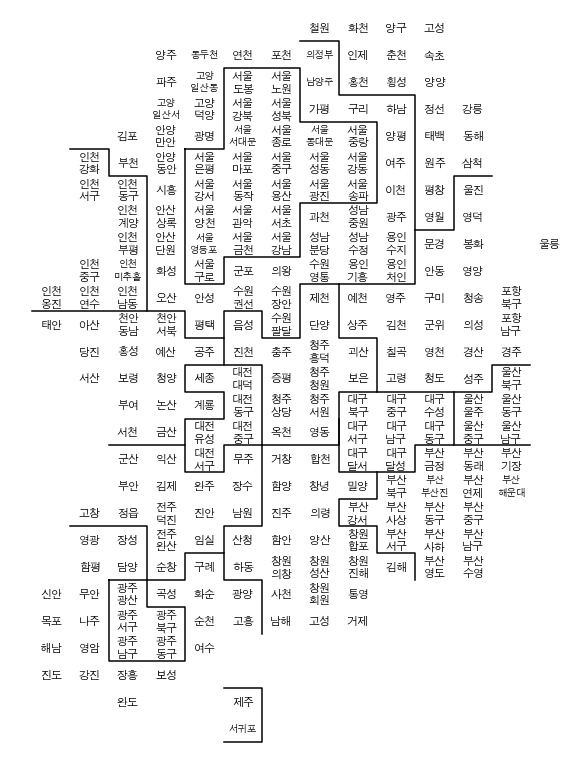

In [53]:
plt.figure(figsize=(8, 11))

for idx, row in draw_korea.iterrows():
    if len(row['ID'].split())==2:
        dispname = '{}\n{}'.format(row['ID'].split()[0],row['ID'].split()[1])
    elif row['ID'][:2]=='고성':
        dispname = '고성'
    else:
        dispname = row['ID']

    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2
    plt.annotate(dispname, (row['x']+0.5,row['y']+0.5), weight='bold',
        fontsize=fontsize, ha='center', va='center',
        linespacing=linespacing)

for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs,ys,c='black', lw=1.5)

plt.gca().invert_yaxis()

plt.axis('off')

plt.tight_layout()
plt.show()

In [54]:
df_coffee = pd.merge(cafe, draw_korea, how='outer',on='ID')
df_coffee

,ID,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,커피지수,y,x
0,강릉,5.0,0.0,14.0,2.0,0.312500,3.0,11.0
1,거제,5.0,0.0,7.0,0.0,0.714286,22.0,8.0
2,경산,8.0,0.0,9.0,3.0,0.666667,12.0,11.0
3,경주,8.0,2.0,24.0,2.0,0.384615,12.0,12.0
4,계룡,1.0,0.0,0.0,0.0,0.000000,14.0,4.0
...,...,...,...,...,...,...,...,...
249,구례,NaN,NaN,NaN,NaN,NaN,20.0,4.0
250,신안,NaN,NaN,NaN,NaN,NaN,21.0,0.0
251,화순,NaN,NaN,NaN,NaN,NaN,21.0,4.0
252,장흥,NaN,NaN,NaN,NaN,NaN,24.0,2.0


In [55]:
df_coffee.fillna(0.0,inplace=True)

In [56]:
def drawKorea(targetData, blockedMap, cmapname):
    gamma = 0.75

    whitelabelmin = 20.

    datalabel = targetData

    tmp_max = max([np.abs(min(blockedMap[targetData])),np.abs(max(blockedMap[targetData]))])
    vmin, vmax = -tmp_max, tmp_max
    

    mapdata = blockedMap.pivot_table(index='y', columns='x', values=targetData)
    masked_mapdata = np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(9, 11))
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=cmapname, edgecolor='#aaaaaa', linewidth=0.5)

    
    for idx, row in draw_korea.iterrows():
        if len(row['ID'].split())==2:
            dispname = '{}\n{}'.format(row['ID'].split()[0],row['ID'].split()[1])
        elif row['ID'][:2]=='고성':
            dispname = '고성'
        else:
            dispname = row['ID']

        if len(dispname.splitlines()[-1]) >= 3:
            fontsize, linespacing = 9.5, 1.5
        else:
            fontsize, linespacing = 11, 1.2
        plt.annotate(dispname, (row['x']+0.5,row['y']+0.5), weight='bold',
            fontsize=fontsize, ha='center', va='center',
            linespacing=linespacing)
    for path in BORDER_LINES:
        ys, xs = zip(*path)
        plt.plot(xs,ys,c='black', lw=1.5)
    plt.gca().invert_yaxis()

    plt.axis('off')
    cb = plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalabel)

    plt.tight_layout()
    plt.show()

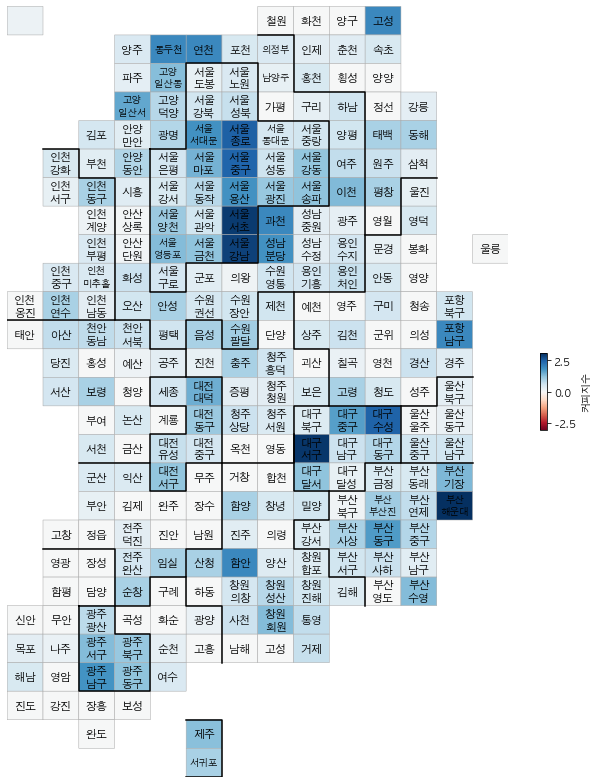

In [57]:
drawKorea('커피지수', df_coffee, 'RdBu')

### 커피지수 순위

In [58]:
# 커피지수 Top10
df_coffee.sort_values(by='커피지수',ascending=False).head(10)

,ID,스타벅스 매장수,커피빈 매장수,이디야 매장수,빽다방 매장수,커피지수,y,x
65,부산 해운대,29.0,5.0,9.0,2.0,3.090909,17.0,12.0
36,대구 서구,3.0,0.0,1.0,0.0,3.000000,15.0,8.0
87,서울 서초,49.0,31.0,20.0,7.0,2.962963,7.0,6.0
73,서울 강남,87.0,69.0,42.0,12.0,2.888889,8.0,6.0
95,서울 종로,33.0,15.0,14.0,5.0,2.526316,4.0,6.0
37,대구 수성,23.0,2.0,8.0,2.0,2.500000,14.0,10.0
96,서울 중구,57.0,15.0,22.0,7.0,2.482759,5.0,6.0
195,함안,0.0,2.0,1.0,0.0,2.000000,19.0,6.0
6,고성(강원),2.0,0.0,1.0,0.0,2.000000,0.0,10.0
183,포항 남구,10.0,0.0,4.0,1.0,2.000000,11.0,12.0


### Folium 지도로 커피지수 표시

In [59]:
import folium
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [60]:
df_folium = df_coffee.set_index('ID')

In [61]:
geo_path = './data/skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[36.2002, 127.054], zoom_start=7)
map.choropleth(geo_data = geo_data,  
               data = df_folium['커피지수'],
               columns= [df_folium.index, df_folium['커피지수']],
               fill_color= 'YlGnBu',
               key_on='feature.id'
)

loc = 'Corpus Christi'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>커피지수와 카페</b></h3>
             '''.format(loc)   
map.get_root().html.add_child(folium.Element(title_html))


map